In [4]:
from Agents import SARSA_LSFA, PGAC_DNN, SARSA_QTable, MonteCarlo_QTable
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from urllib import request
import sys
import pandas as pd

notify = False

gamespace = (7,50)
args = { # 1-5
        'OPP_STRAT' : 1,
        # Default 1
        'OPP_FREQ' : 1,
        # Default 1000000, 10000  (QT, LSFA/DNN)
        'NUM_EPISODES' : 10000, # All        !!!! Change for LSFA
        # Default 0.9,1,1 (QT, LSFA,DNN)          
        'GAMMA' : 0.9,
        # Default 0.2, 0.008, 0.0005  (QT,LSFA,DNN)
        'ALPHA' : 0.2, # SARSA, MC, LSFA    !!!! Change for LSFA
        # Default 0.05, 0.01
        'EPSILON' : 0.05, # SARSA, MC         !!!! Change for LSFA
        # Default: 10000,100
        'AVG_WINDOW' : 100,  #               !!!! Change for LSFA
        # Default: 1000
        'TEST_EPISODES': 1000,
        # Default: True
        'CHECK_STABLE': True,
        # Default: ''
        'add_label' : '',
    }


 20%|█████████████                                                    | 1/5 [00:00<00:00,  6.86it/s]--- 1.96 seconds ---
Evaluating:
100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.30it/s]
/Users/sunaybhat/miniconda3/envs/py36_ML/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
 20%|█████████████                                                    | 1/5 [00:00<00:00,  7.83it/s]--- 1.99 seconds ---
Evaluating:
100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.80it/s]
/Users/sunaybhat/miniconda3/envs/py36_ML/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
 20%|█████████████                              

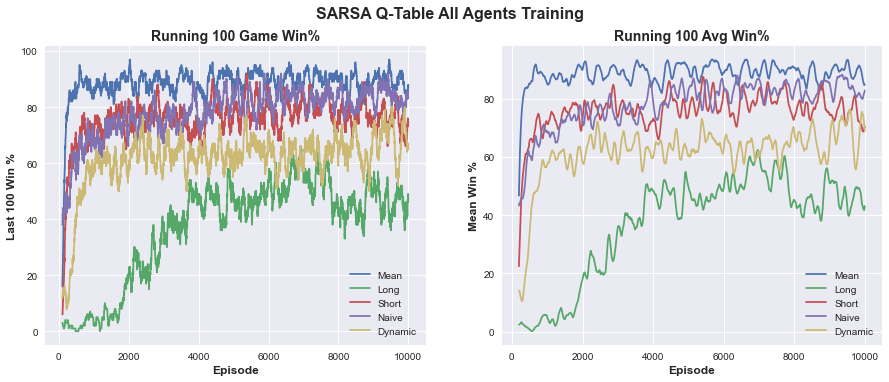

TypeError: only size-1 arrays can be converted to Python scalars

In [5]:
# # Run All 
stringM = 'SARSA Q-Table'
savepath = 'Data/SARSA_QT/'
train_histories = np.zeros((5,args['NUM_EPISODES']))
win100 = np.zeros((5,args['NUM_EPISODES']-99))
win_avg = np.zeros((5,args['NUM_EPISODES']-98-args['AVG_WINDOW']))
test_win_percent = np.zeros((5,5))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5.5), facecolor='w', edgecolor='k')
fig.suptitle(stringM + ' All Agents Training',fontweight='bold',fontsize = 16)

fig2,ax3 = plt.subplots(1,1,figsize=(10.5,6))
xlabels = ['Mean','Long','Short','Naive','Dynamic']
ax3.set_title(stringM + ' All Agent Win %\n Number Test Episodes: {}'.format(args['TEST_EPISODES']),fontweight='bold',fontsize = 15)

for i in range (0,5):
    args['OPP_STRAT'] = i+1
    Agent = SARSA_QTable(args)
    train_histories[i,:] = Agent.train()
    test_win_percent[i,:] = Agent.evaluate()

    win100[i,:] = np.flip(np.convolve(np.flip(train_histories[i,:]), np.ones(100), mode='valid'))
    win_avg[i,:] = np.flip(np.convolve(np.flip(win100[i,:]), np.ones(args['AVG_WINDOW'])/args['AVG_WINDOW'], mode='valid'))
    ax1.plot(range(99,args['NUM_EPISODES']),win100[i,:])
    ax2.plot(range(99+args['AVG_WINDOW']-1,args['NUM_EPISODES']),win_avg[i,:])
    ax3.bar(np.arange(5)+i*0.15-0.375,test_win_percent[i,:],width=0.15)
    for ibar,y in enumerate(test_win_percent):
        ax3.text(ibar+i*0.15-0.375, y, y, ha = 'center',fontweight='bold',fontsize = 6)

ax1.set_title('Running 100 Game Win%',fontweight='bold',fontsize = 14)
ax1.set_xlabel('Episode',fontweight='bold',fontsize = 12)
ax1.set_ylabel('Last 100 Win %',fontweight='bold',fontsize = 12)
ax1.grid(True, color='w', linestyle='-', linewidth=1)
ax1.legend(['Mean','Long','Short','Naive','Dynamic'])

ax2.set_title('Running {:,} Avg Win%'.format(args['AVG_WINDOW']), fontweight='bold',fontsize = 14)
ax2.set_xlabel('Episode', fontweight='bold',fontsize = 12)
ax2.set_ylabel('Mean Win %', fontweight='bold',fontsize = 12)
ax2.grid(True, color='w', linestyle='-', linewidth=1)
ax2.legend(['Mean','Long','Short','Naive','Dynamic'])

ax3.set_xlabel('Opponent Strategies',fontweight='bold',fontsize = 12)
ax3.set_ylabel('Win %',fontweight='bold',fontsize = 12)
ax3.set_ylim([0,100])
ax3.set_xticklabels(['','Mean','Long','Short','Naive','Dynamic'])
ax3.legend(['Mean','Long','Short','Naive','Dynamic'],title='Trained Agents',loc='center left', frameon=True,bbox_to_anchor=(0.97, 0.5))

In [14]:
print(test_win_percent)
np.mean(np.ma.masked_array(test_win_percent, mask= (np.eye(5))),1)

[[89.9  6.1 48.8 45.6 48.7]
 [49.5 45.5 58.3 82.  59.8]
 [58.6  8.8 77.8 73.  53. ]
 [21.1  5.4 38.  85.9 35.2]
 [91.  23.7 79.2 81.  67. ]]


masked_array(data=[37.3, 62.400000000000006, 48.35, 24.925, 68.725],
             mask=[False, False, False, False, False],
       fill_value=1e+20)

In [8]:
print('In Strategy Performance: {}'.format(np.diagonal(test_win_percent)))
print('In Strategy Mean {}'.format(np.diagonal(test_win_percent).mean()))

print('Out Strategy Performance: {}'.format(np.mean(np.ma.masked_array(test_win_percent, mask= (np.eye(5))),1)))
print('Out Strategy Mean {}'.format(np.ma.masked_array(test_win_percent, mask= (np.eye(5))).mean()))

In Strategy Performance: [89.9 45.5 77.8 85.9 67. ]
In Strategy Mean 73.22
Out Strategy Performance: [37.3 62.400000000000006 48.35 24.925 68.725]
Out Strategy Mean 48.339999999999996
